In [1]:
# using Plots

In [2]:
using RDatasets

In [3]:
iris = dataset("datasets", "iris");


In [4]:
unique(iris.Species)
species_color = Dict("virginica" => "cyan", "setosa" => "magenta", "versicolor" => "yellow")
transform!(iris, :Species => ByRow(s -> species_color[s]) => :Color)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Color
,Float64,Float64,Float64,Float64,Cat…,String
1,5.1,3.5,1.4,0.2,setosa,magenta
2,4.9,3.0,1.4,0.2,setosa,magenta
3,4.7,3.2,1.3,0.2,setosa,magenta
4,4.6,3.1,1.5,0.2,setosa,magenta
5,5.0,3.6,1.4,0.2,setosa,magenta
6,5.4,3.9,1.7,0.4,setosa,magenta
7,4.6,3.4,1.4,0.3,setosa,magenta
8,5.0,3.4,1.5,0.2,setosa,magenta
9,4.4,2.9,1.4,0.2,setosa,magenta


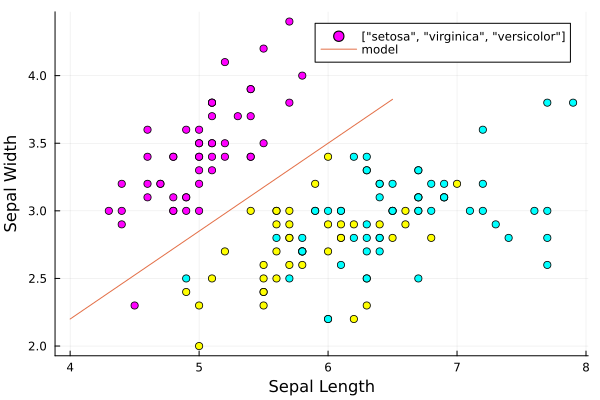

In [5]:
scatter(label=["setosa", "virginica", "versicolor"], xlabel="Sepal Length", ylabel="Sepal Width", iris.SepalLength, iris.SepalWidth, color=iris.Color)
x = 4:0.1:6.5;
y = (x -> 0.65 * x - 0.4)
plot!(x, y, label="model")

In [6]:
2.4 - 0.65 * 4

-0.20000000000000018

In [7]:
using Gadfly

In [8]:
plot(dataset("datasets","iris"), x="SepalWidth", y="SepalLength", color="Species")

LoadError: UndefVarError: `plot` not defined

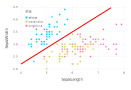

In [19]:
using RDatasets, Gadfly, Compose
set_default_plot_size(131.25mm, 90mm)
iris = dataset("datasets","iris")
p = plot(iris, 
    layer(x= :SepalLength, y= :SepalWidth, color= :Species),
    layer(x -> 0.65 * x - 0.4, 4, 7.5, color=[colorant"red"], style(line_width=1mm)),
    Guide.colorkey(title="Iris", pos=[0.05w,-0.28h]))


In [20]:
import Cairo,
Fontconfig
draw(PDF("iris_plot.pdf", 131.25mm, 90mm), p)

In [18]:
1.25 .* [105, 72]

2-element Vector{Float64}:
 131.25
  90.0